In [2]:
from mplsoccer import Pitch, FontManager, Sbopen, VerticalPitch
import numpy as np
from matplotlib.colors import to_rgba
import pandas as pd
from matplotlib import pyplot as plt

In [8]:
# Spain vs Poland
MATCH_ID = 3788762
TEAM = 'Poland'
parser = Sbopen()
events, related, freeze, players = parser.event(MATCH_ID)

In [9]:
players

,jersey_number,match_id,id,player_id,player_name,position_id,position_name,event_tactics_id
0,23,3788762,79d195f9-b5aa-40a7-9258-f0c6a2e779f4,11748,Unai Simón Mendibil,1,Goalkeeper,1
1,6,3788762,79d195f9-b5aa-40a7-9258-f0c6a2e779f4,6840,Marcos Llorente Moreno,2,Right Back,2
2,24,3788762,79d195f9-b5aa-40a7-9258-f0c6a2e779f4,4353,Aymeric Laporte,3,Right Center Back,3
3,4,3788762,79d195f9-b5aa-40a7-9258-f0c6a2e779f4,6892,Pau Francisco Torres,5,Left Center Back,4
4,18,3788762,79d195f9-b5aa-40a7-9258-f0c6a2e779f4,5211,Jordi Alba Ramos,6,Left Back,5
5,16,3788762,79d195f9-b5aa-40a7-9258-f0c6a2e779f4,6765,Rodrigo Hernández Cascante,10,Center Defensive Midfield,6
6,8,3788762,79d195f9-b5aa-40a7-9258-f0c6a2e779f4,5199,Jorge Resurrección Merodio,13,Right Center Midfield,7
7,26,3788762,79d195f9-b5aa-40a7-9258-f0c6a2e779f4,30486,Pedro González López,15,Left Center Midfield,8
8,9,3788762,79d195f9-b5aa-40a7-9258-f0c6a2e779f4,6766,Gerard Moreno Balaguero,17,Right Wing,9
9,19,3788762,79d195f9-b5aa-40a7-9258-f0c6a2e779f4,16532,Daniel Olmo Carvajal,21,Left Wing,10


In [10]:
events.columns

Index(['id', 'index', 'period', 'timestamp', 'minute', 'second', 'possession',
       'duration', 'match_id', 'type_id', 'type_name', 'possession_team_id',
       'possession_team_name', 'play_pattern_id', 'play_pattern_name',
       'team_id', 'team_name', 'tactics_formation', 'player_id', 'player_name',
       'position_id', 'position_name', 'pass_recipient_id',
       'pass_recipient_name', 'pass_length', 'pass_angle', 'pass_height_id',
       'pass_height_name', 'end_x', 'end_y', 'sub_type_id', 'sub_type_name',
       'body_part_id', 'body_part_name', 'x', 'y', 'outcome_id',
       'outcome_name', 'out', 'under_pressure',
       'ball_recovery_recovery_failure', 'pass_deflected', 'aerial_won',
       'counterpress', 'pass_switch', 'off_camera', 'foul_won_defensive',
       'shot_statsbomb_xg', 'end_z', 'technique_id', 'technique_name',
       'goalkeeper_position_id', 'goalkeeper_position_name', 'pass_cross',
       'pass_cut_back', 'pass_assisted_shot_id', 'pass_shot_assist',
    

In [11]:
passes_ws = events.loc[(events.team_name == TEAM) & (events.type_name == 'Pass') & (events.player_name == 'Wojciech Szczęsny')]
passes_ws_l = events.loc[(events.team_name == TEAM) & (events.type_name == 'Pass') & (events.player_name == 'Wojciech Szczęsny') & (events.pass_length >= 35)]
passes_ws_m = events.loc[(events.team_name == TEAM) & (events.type_name == 'Pass') & (events.player_name == 'Wojciech Szczęsny') & (events.pass_length < 35) & (events.pass_length >= 15)]
passes_ws_s = events.loc[(events.team_name == TEAM) & (events.type_name == 'Pass') & (events.player_name == 'Wojciech Szczęsny') & (events.pass_length < 15)]


In [12]:
print(len(passes_ws))
print(len(passes_ws_l))
print(len(passes_ws_m))
print(len(passes_ws_s))

32
30
2
0


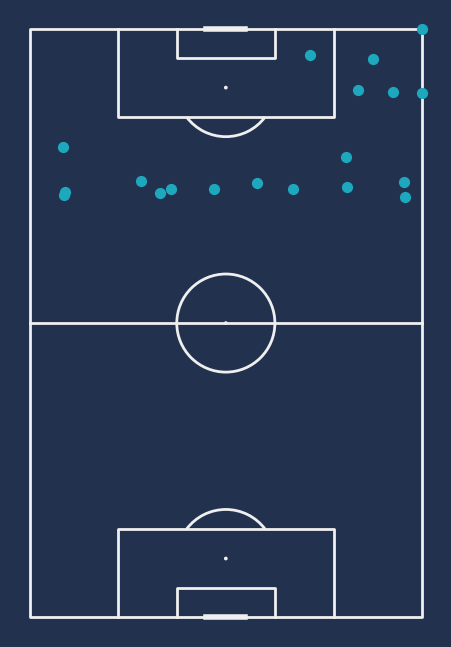

In [30]:
pitch = VerticalPitch(pitch_type='statsbomb', pitch_color='#22314E', line_color='#efefef')
fig, ax = pitch.draw(figsize=(4.4, 6.4), constrained_layout=True, tight_layout=False)
fig.set_facecolor("#22314E")


pass_nodes = pitch.scatter(passes_3.x, passes_3.y,
                           s=50,
                           color='#1EA8BD', edgecolors='#1EA8BD', linewidth=1, alpha=1, ax=ax)
